In [1]:
using SingleAtom
using PyPlot

In [2]:
function get_phase_exps!{T}(ary::AbstractVector{Complex{T}},
                            tracker::SingleAtom.PhaseTracker, dt)
    len = length(ary)
    SingleAtom.init_phase!(tracker)
    @inbounds for i in 1:len
        phase, exp_t = SingleAtom.update_phase!(tracker, dt)
        ary[i] = exp_t
    end
    ary
end

function get_phase_average{T}(tracker::SingleAtom.PhaseTracker{T}, dt, len, nrep)
    accum = StructOfArrays(Complex{T}, len)
    sins = zeros(T, len)
    coss = zeros(T, len)
    @inbounds for i in 1:nrep
        get_phase_exps!(accum, tracker, dt)
        @simd for j in 1:len
            exp_t = accum[j]
            sins[j] += imag(exp_t)
            coss[j] += real(exp_t)
        end
    end
    @simd for j in 1:len
        sins[j] /= nrep
        coss[j] /= nrep
    end
    ([(1:len) * dt;], sins, coss)
end

get_phase_average (generic function with 1 method)

In [3]:
function plot_sins_coss(ts, sins, coss)
    plot(ts, sins)
    plot(ts, coss)
    xlim([0, ts[end]])
end

plot_sins_coss (generic function with 1 method)

In [4]:
# A drive with constant initial phase but random phase slip
dri1 = Drive{Vec3D{Complex64}(1f0, 0f0, 0f0)}(1, 1, 0, 1000.0)
tracker1 = SingleAtom.PhaseTracker(dri1)

SingleAtom.Optical.PhaseTracker{Float32}(1.0f0,0.0f0,1000.0f0,0.0f0,1.0f0 + 0.0f0im)

In [5]:
# A drive with constant initial phase but random phase slip
dri2 = Drive{Vec3D{Complex64}(1f0, 0f0, 0f0)}(1, 0.003, 0, 1000.0)
tracker2 = SingleAtom.PhaseTracker(dri2)

SingleAtom.Optical.PhaseTracker{Float32}(0.003f0,0.0f0,1000.0f0,0.0f0,1.0f0 + 0.0f0im)

In [6]:
ts1_1, sins1_1, coss1_1 = get_phase_average(tracker1, 0.1f0, 100000, 10000)
ts1_2, sins1_2, coss1_2 = get_phase_average(tracker1, 0.2f0, 50000, 10000)
ts1_3, sins1_3, coss1_3 = get_phase_average(tracker1, 0.4f0, 25000, 10000)

(Float32[0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2,3.6,4.0  …  9996.4,9996.8,9997.2,9997.6,9998.0,9998.4,9998.8,9999.2,9999.6,10000.0],Float32[-0.389439,-0.71713,-0.93164,-0.998914,-0.908491,-0.674826,-0.334645,0.0583572,0.441825,0.755786  …  0.00703909,-0.00369901,-0.0136377,-0.0215883,-0.0259477,-0.0262947,-0.0226837,-0.0154961,-0.00566427,0.00503283],Float32[0.920877,0.69647,0.362012,-0.029476,-0.415907,-0.73663,-0.941112,-0.996971,-0.895434,-0.652266  …  0.0258789,0.0264574,0.0230577,0.0159427,0.00632526,-0.00433794,-0.014164,-0.0218906,-0.0262229,-0.0261592])

In [7]:
ts2_1, sins2_1, coss2_1 = get_phase_average(tracker2, 0.1f0, 100000, 10000)
ts2_2, sins2_2, coss2_2 = get_phase_average(tracker2, 0.2f0, 50000, 10000)
ts2_3, sins2_3, coss2_3 = get_phase_average(tracker2, 0.4f0, 25000, 10000)

(Float32[0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2,3.6,4.0  …  9996.4,9996.8,9997.2,9997.6,9998.0,9998.4,9998.8,9999.2,9999.6,10000.0],Float32[-0.00148964,-0.00269134,-0.00407646,-0.00524314,-0.00678819,-0.00807009,-0.0091614,-0.0107127,-0.0118366,-0.0132813  …  0.00716886,0.00712758,0.00700023,0.0070928,0.00731695,0.00739638,0.00733605,0.00727622,0.00737285,0.00722909],Float32[0.99987,0.999685,0.999513,0.999334,0.999165,0.998984,0.998806,0.998624,0.998441,0.998262  …  0.00153945,0.00138798,0.00158109,0.00148206,0.00139405,0.00129447,0.00125419,0.0011151,0.00108593,0.00115858])

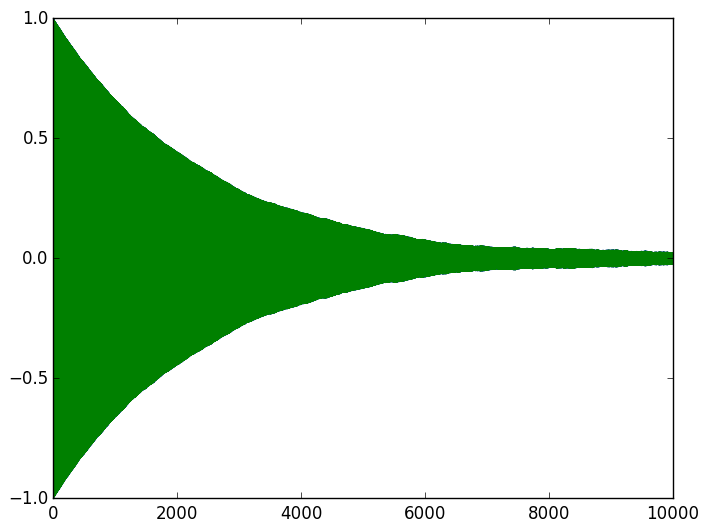

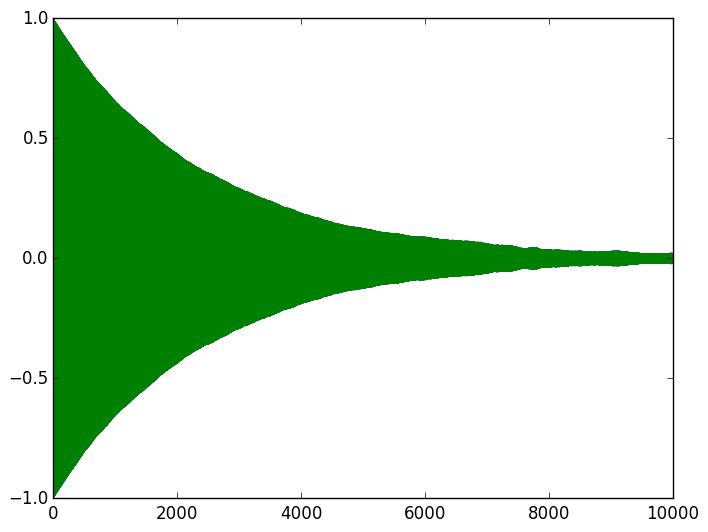

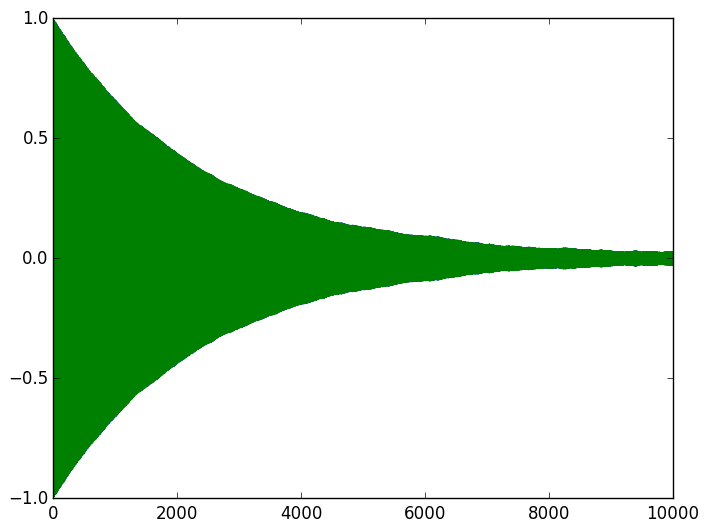

(0-dimensional Array{Float32,0}:
0.0,0-dimensional Array{Float32,0}:
10000.0)

In [8]:
figure()
plot_sins_coss(ts1_1, sins1_1, coss1_1)
figure()
plot_sins_coss(ts1_2, sins1_2, coss1_2)
figure()
plot_sins_coss(ts1_3, sins1_3, coss1_3)

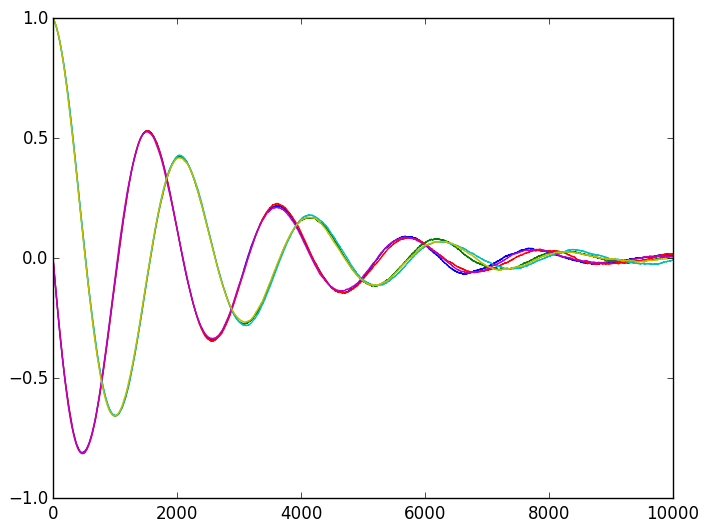

(0-dimensional Array{Float32,0}:
0.0,0-dimensional Array{Float32,0}:
10000.0)

In [9]:
plot_sins_coss(ts2_1, sins2_1, coss2_1)
plot_sins_coss(ts2_2, sins2_2, coss2_2)
plot_sins_coss(ts2_3, sins2_3, coss2_3)